In [38]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import waveoptics as wv
from waveoptics.devices.slm import SLMPistonSquare

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


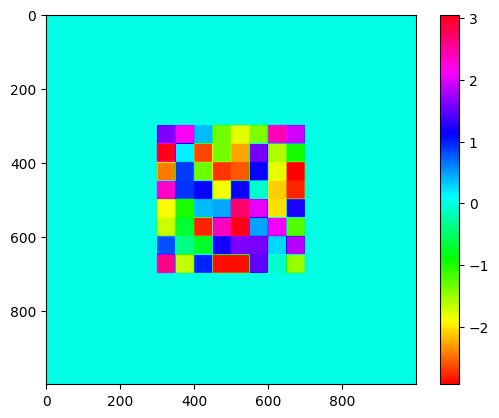

In [55]:
slm = SLMPistonSquare(width=1000, height=1000, roi_size=400, roi_shifts=[500, 500])
slm.generate_phases(8)

plt.imshow(np.angle(slm.phase_matrix), cmap='hsv')
plt.colorbar()

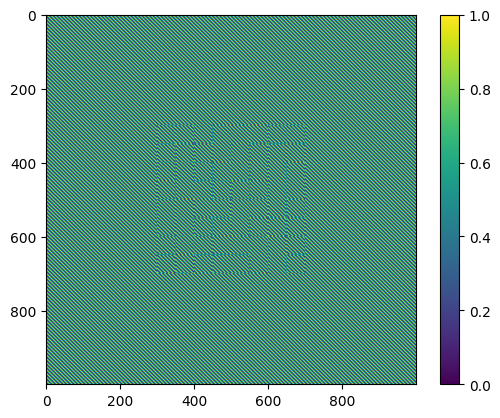

In [65]:
x = np.arange(slm.phase_matrix.shape[0])
x, y = np.meshgrid(x, x)
nu0 = 0.1

lee_hologram = (0.5
                + 0.25 * np.exp(1j * 2 * np.pi * (x - y) * nu0) * np.exp(-1j * np.angle(slm.phase_matrix))
                + 0.25 * np.exp(1j * 2 * np.pi * (y - x) * nu0) * np.exp(+1j * np.angle(slm.phase_matrix))
                )



plt.imshow(np.abs(lee_hologram))
plt.colorbar()

C:\Users\saucourt\AppData\Local\Temp\ipykernel_24340\1721664834.py:3: RuntimeWarning: divide by zero encountered in log
  ft_log = 10*np.log(np.abs(ft))
C:\Users\saucourt\AppData\Local\Temp\ipykernel_24340\1721664834.py:10: RuntimeWarning: divide by zero encountered in log
  ft_crop_log = 10*np.log(np.abs(ft_crop))


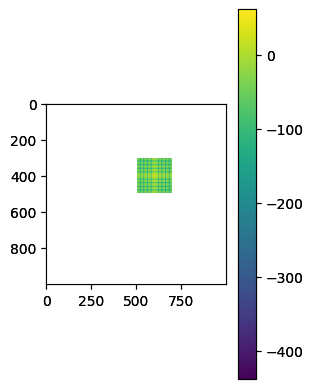

In [76]:
from waveoptics.propag.numpy import fft_2d, ifft_2d
ft = fft_2d(lee_hologram)
ft_log = 10*np.log(np.abs(ft))

ft_crop = np.copy(ft)
ft_crop[:300, :] = 0
ft_crop[500:, :] = 0
ft_crop[:, :500] = 0
ft_crop[:, 700:] = 0
ft_crop_log = 10*np.log(np.abs(ft_crop))

plt.subplot(1, 2, 1)
plt.imshow(ft_log, vmax = np.max(ft_log), vmin=np.max(ft_log) - 500)
plt.colorbar()

plt.subplot(1, 2, 1)
plt.imshow(ft_crop_log, vmax = np.max(ft_log), vmin=np.max(ft_log) - 500)
plt.colorbar()